In [9]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('../Data/df_total.csv', sep=";") 
df.head(2)

,Titulo,Link,Precio Normal,Precio Online,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Tipo de Memoria Ram,Tienda
0,"Laptop Asus ROG Flow X13 GV301QH 13.4"" AMD Ryz...",https://hiraoka.com.pe/computo-y-tecnologia/co...,15199.0,15199,ROG Flow X13 GV301QH,ASUS,NVIDIA GeForce GTX 1650,AMD Ryzen 9,16GB,13.4'',SSD,1TB,WUXGA,DDR4,Hiraoka
1,"Laptop Gamer Acer PT516-51S-76HY 16"" Intel Cor...",https://hiraoka.com.pe/computo-y-tecnologia/co...,13999.0,13399,PT516-51S-76HY,ACER,NVIDIA GeForce RTX 3080,Intel Core i7,8GB,16'',SSD,1TB,WQXGA,DDR4,Hiraoka


In [12]:
df['Precio Normal'] = df['Precio Normal'].fillna(0)
df['Precio Normal'] = np.where(df['Precio Normal']==0.0, df['Precio Online'], df['Precio Normal'])
df['Precio Normal']

0      15199.0
1      13999.0
2      13699.0
3      13075.0
4      14959.0
        ...   
238     1319.0
239     1899.0
240     2329.0
241     1099.0
242     1080.0
Name: Precio Normal, Length: 243, dtype: float64

In [13]:
df.head(3)

,Titulo,Link,Precio Normal,Precio Online,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Tipo de Memoria Ram,Tienda
0,"Laptop Asus ROG Flow X13 GV301QH 13.4"" AMD Ryz...",https://hiraoka.com.pe/computo-y-tecnologia/co...,15199.0,15199,ROG Flow X13 GV301QH,ASUS,NVIDIA GeForce GTX 1650,AMD Ryzen 9,16GB,13.4'',SSD,1TB,WUXGA,DDR4,Hiraoka
1,"Laptop Gamer Acer PT516-51S-76HY 16"" Intel Cor...",https://hiraoka.com.pe/computo-y-tecnologia/co...,13999.0,13399,PT516-51S-76HY,ACER,NVIDIA GeForce RTX 3080,Intel Core i7,8GB,16'',SSD,1TB,WQXGA,DDR4,Hiraoka
2,Laptop Gamer ASUS ROG Flow X13 GV301QH 13.4'' ...,https://www.oechsle.pe/laptop-gamer-asus-rog-f...,13699.0,13099,GV301QH-K6320T,ASUS,AMD,AMD Ryzen 9,16GB,13.4'',SSD,1TB,IPS,NaN,Oechsle


In [14]:
# Observando los valores nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Titulo                  243 non-null    object 
 1   Link                    243 non-null    object 
 2   Precio Normal           243 non-null    float64
 3   Precio Online           243 non-null    int64  
 4   Modelo                  243 non-null    object 
 5   Marca                   243 non-null    object 
 6   Tarjeta de Video        235 non-null    object 
 7   Procesador              243 non-null    object 
 8   Memoria Ram             243 non-null    object 
 9   Pulgadas Pantalla       243 non-null    object 
 10  Tipo de Almacenamiento  243 non-null    object 
 11  Almacenamiento          243 non-null    object 
 12  Tipo de Pantalla        239 non-null    object 
 13  Tipo de Memoria Ram     119 non-null    object 
 14  Tienda                  243 non-null    ob

In [15]:
df.isnull().sum()

Titulo                      0
Link                        0
Precio Normal               0
Precio Online               0
Modelo                      0
Marca                       0
Tarjeta de Video            8
Procesador                  0
Memoria Ram                 0
Pulgadas Pantalla           0
Tipo de Almacenamiento      0
Almacenamiento              0
Tipo de Pantalla            4
Tipo de Memoria Ram       124
Tienda                      0
dtype: int64

Convertir el Precio Normal en variable categórica



*   De 1000 - 4200: Aumenta en 400 
*   De 4200 - 9200: Aumenta en 1000
*   De 10000 - 15200: Aumenta en 5200



In [16]:
df['Precio Normal_categ'] = pd.cut(df['Precio Normal'], [1000, 1400, 1800, 2200, 2600, 3000, 3400, 3800,4200,
                                                      5200, 6200, 7200, 8200, 9200, 10000, 15200],
                              labels = ['1000-1400','1400-1800','1800-2200','2200-2600','2600-3000','3000-3400',
                                        '3400-3800','3800-4200','4200-5200','5200-6200','6200-7200','7200-8200',
                                        '8200-9200','9200-10000','10000-15200'])

Convertir el Precio Online en variable categórica

In [17]:
df['Precio Online_categ'] = pd.cut(df['Precio Online'], [980, 1400, 1800, 2200, 2600, 3000, 3400, 3800,4200,
                                                      5200, 6200, 7200, 8200, 9200, 10000, 15200],
                              labels = ['980-1400','1400-1800','1800-2200','2200-2600','2600-3000','3000-3400',
                                        '3400-3800','3800-4200','4200-5200','5200-6200','6200-7200','7200-8200',
                                        '8200-9200','9200-10000','10000-15200'])  

In [18]:
# Generando una copia del dataframe 
df_copy = df.copy()

In [19]:
# Eliminando columnas 
df = df.drop(['Titulo','Link','Tienda','Tipo de Memoria Ram','Precio Normal','Precio Online'], axis = 1)

In [20]:
conteo_Precio_online_catg = (df[['Precio Online_categ']]                 # Seleccion de columna y elimino NaNs
                            .groupby(['Precio Online_categ']).size()     # Agrupo y cuento las obs. por intervalo de
                            .reset_index()                               # Convierte a df 
                            .rename({0: 'conteo'}, axis=1)               # Cambia el nombre de "0" a "conteo"
                            .sort_values(by=['conteo'],ascending=False)) # Ordena los Datos de mayor a menor
#conteo_Precio_online_catg.head(20)

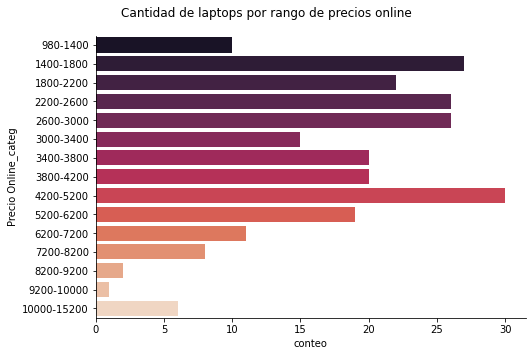

In [21]:
graf_Precio_online_catg = sns.catplot(data=conteo_Precio_online_catg, kind="bar",
                          x="conteo", y="Precio Online_categ", aspect=1.5, palette = 'rocket')

graf_Precio_online_catg.fig.subplots_adjust(top=0.9)
graf_Precio_online_catg.fig.suptitle('Cantidad de laptops por rango de precios online')
plt.show()

In [22]:
df.info() # Comprobando de no existen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Modelo                  243 non-null    object  
 1   Marca                   243 non-null    object  
 2   Tarjeta de Video        235 non-null    object  
 3   Procesador              243 non-null    object  
 4   Memoria Ram             243 non-null    object  
 5   Pulgadas Pantalla       243 non-null    object  
 6   Tipo de Almacenamiento  243 non-null    object  
 7   Almacenamiento          243 non-null    object  
 8   Tipo de Pantalla        239 non-null    object  
 9   Precio Normal_categ     243 non-null    category
 10  Precio Online_categ     243 non-null    category
dtypes: category(2), object(9)
memory usage: 19.0+ KB


In [23]:
df.isnull().sum() # Comprobando de no existen valores nulos

Modelo                    0
Marca                     0
Tarjeta de Video          8
Procesador                0
Memoria Ram               0
Pulgadas Pantalla         0
Tipo de Almacenamiento    0
Almacenamiento            0
Tipo de Pantalla          4
Precio Normal_categ       0
Precio Online_categ       0
dtype: int64

In [24]:
# Reemplazando valores nulos para la variable Tarjeta de video
#df = df.fillna('No especifica')
df['Tarjeta de Video']  = df['Tarjeta de Video'].fillna('No especifica')
df['Tipo de Pantalla']  = df['Tipo de Pantalla'].fillna('No especifica') 

Preparación de los Datos

In [25]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data = df.apply(label_encoder.fit_transform)
data.head(3)

,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Precio Normal_categ,Precio Online_categ
0,157,2,8,3,1,2,1,1,19,1,0
1,153,0,18,8,3,8,1,1,18,1,0
2,91,2,0,3,1,2,1,1,6,1,0


In [26]:
# Construyendo el modelo con 5 clusters
kmode = KModes(n_clusters = 5, init = 'Huang', n_init = 5, verbose=1, random_state = 123)
clusters = kmode.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 66, cost: 1308.0
Run 1, iteration: 2/100, moves: 31, cost: 1298.0
Run 1, iteration: 3/100, moves: 1, cost: 1298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 19, cost: 1308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 49, cost: 1291.0
Run 3, iteration: 2/100, moves: 43, cost: 1267.0
Run 3, iteration: 3/100, moves: 5, cost: 1266.0
Run 3, iteration: 4/100, moves: 0, cost: 1266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 104, cost: 1281.0
Run 4, iteration: 2/100, moves: 10, cost: 1281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 79, cost: 1330.0
Run 5, iteration: 2/100, moves: 14, cost: 1330.0
Best run was n

In [27]:
import pickle 
import os
filename = 'clusters.sav'
pickle.dump(clusters, open(os.path.join(filename), 'wb'))

In [28]:
# Predicción de Clusters
clusters

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 2, 0, 2, 2, 2, 2,
       3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 4, 2, 2, 3, 2,
       2, 2, 2, 1, 3, 2, 4, 3, 2, 1, 2, 2, 2, 4, 3, 3, 2, 2, 1, 3, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 3, 4, 4, 3, 2, 3, 4, 3,
       1, 1, 1, 0, 4, 1, 1, 1, 1, 4, 1, 1, 0, 1, 3, 0, 1, 1, 3, 3, 3, 1,
       4, 2, 1, 1, 4, 3, 1, 1, 1, 3, 4, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 2,
       3, 3, 1, 4, 3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 4, 1, 1, 1, 3, 3, 1,
       0], dtype=uint16)

In [29]:
# Obteniendo los centroides
Cluster_Centroide_df = pd.DataFrame(kmode.cluster_centroids_) 

In [30]:
Cluster_Centroide_df.columns = data.columns

In [31]:
Cluster_Centroide_df

,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Precio Normal_categ,Precio Online_categ
0,83,2,0,8,1,7,1,6,1,10,9
1,3,4,3,6,3,7,1,3,5,4,1
2,74,2,3,8,3,7,1,6,1,9,8
3,184,0,3,7,3,4,1,3,1,4,2
4,12,4,3,7,3,7,1,6,5,5,4


Elegir K comparando el costo con cada K

In [32]:
cost = []
K = range(1,7)
for num_clusters in list(K):
  kmode = KModes(n_clusters = num_clusters, init ='Huang', n_init = 5, verbose = 1, random_state = 123)
  kmode.fit_predict(data)
  cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1640.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 91, cost: 1445.0
Run 1, iteration: 2/100, moves: 14, cost: 1445.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 52, cost: 1574.0
Run 2, iteration: 2/100, moves:

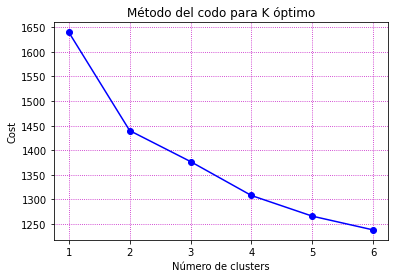

In [33]:
plt.plot(K, cost, marker = 'o', color = 'b')
plt.grid(axis ='both', linestyle ='dotted', color ='m')
plt.xlabel('Número de clusters')
plt.ylabel('Cost')   
plt.title('Método del codo para K óptimo')
plt.show()

Conbinando los clústeres predichos con el Data Frame original

In [34]:
data = df_copy.reset_index()

In [35]:
clusterDF = pd.DataFrame(clusters)
clusterDF.columns = ['cluster_predicted']
combineDF = pd.concat([data, clusterDF], axis = 1).reset_index()
combineDF = combineDF.drop(['index', 'level_0'], axis = 1)

In [36]:
combineDF.head(2)

,Titulo,Link,Precio Normal,Precio Online,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Tipo de Memoria Ram,Tienda,Precio Normal_categ,Precio Online_categ,cluster_predicted
0,"Laptop Asus ROG Flow X13 GV301QH 13.4"" AMD Ryz...",https://hiraoka.com.pe/computo-y-tecnologia/co...,15199.0,15199,ROG Flow X13 GV301QH,ASUS,NVIDIA GeForce GTX 1650,AMD Ryzen 9,16GB,13.4'',SSD,1TB,WUXGA,DDR4,Hiraoka,10000-15200,10000-15200,0
1,"Laptop Gamer Acer PT516-51S-76HY 16"" Intel Cor...",https://hiraoka.com.pe/computo-y-tecnologia/co...,13999.0,13399,PT516-51S-76HY,ACER,NVIDIA GeForce RTX 3080,Intel Core i7,8GB,16'',SSD,1TB,WQXGA,DDR4,Hiraoka,10000-15200,10000-15200,2


Identificamos los Clusters

In [37]:
Cluster_0 = combineDF[combineDF['cluster_predicted'] == 0]
Cluster_1 = combineDF[combineDF['cluster_predicted'] == 1]
Cluster_2 = combineDF[combineDF['cluster_predicted'] == 2]
Cluster_3 = combineDF[combineDF['cluster_predicted'] == 3]
Cluster_4 = combineDF[combineDF['cluster_predicted'] == 4]

In [38]:
df_cluster = pd.DataFrame()
df_cluster = df_cluster.append(Cluster_0,ignore_index=True)
df_cluster = df_cluster.append(Cluster_1,ignore_index=True)
df_cluster = df_cluster.append(Cluster_2,ignore_index=True)
df_cluster = df_cluster.append(Cluster_3,ignore_index=True)
df_cluster = df_cluster.append(Cluster_4,ignore_index=True)

In [39]:
df_cluster.to_csv('ClusterFinal.csv')

In [40]:
Cluster_0.head(3)

,Titulo,Link,Precio Normal,Precio Online,Modelo,Marca,Tarjeta de Video,Procesador,Memoria Ram,Pulgadas Pantalla,Tipo de Almacenamiento,Almacenamiento,Tipo de Pantalla,Tipo de Memoria Ram,Tienda,Precio Normal_categ,Precio Online_categ,cluster_predicted
0,"Laptop Asus ROG Flow X13 GV301QH 13.4"" AMD Ryz...",https://hiraoka.com.pe/computo-y-tecnologia/co...,15199.0,15199,ROG Flow X13 GV301QH,ASUS,NVIDIA GeForce GTX 1650,AMD Ryzen 9,16GB,13.4'',SSD,1TB,WUXGA,DDR4,Hiraoka,10000-15200,10000-15200,0
2,Laptop Gamer ASUS ROG Flow X13 GV301QH 13.4'' ...,https://www.oechsle.pe/laptop-gamer-asus-rog-f...,13699.0,13099,GV301QH-K6320T,ASUS,AMD,AMD Ryzen 9,16GB,13.4'',SSD,1TB,IPS,NaN,Oechsle,10000-15200,10000-15200,0
3,"Apple Macbook Pro 13.3"" RAM 16GB 2TB SSD Silve...",https://www.plazavea.com.pe/apple-macbook-pro-...,13075.0,13075,Z11F-MYDA-07,APPLE,Intel,M1,16GB,13.3'',SSD,2TB,IPS,NaN,Plazavea,10000-15200,10000-15200,0


In [41]:
# Cantidad de elementos por clusters
len(Cluster_0), len(Cluster_1), len(Cluster_2) ,len(Cluster_3),len(Cluster_4)

(61, 56, 67, 32, 27)

In [42]:
Cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 242
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Titulo                  61 non-null     object  
 1   Link                    61 non-null     object  
 2   Precio Normal           61 non-null     float64 
 3   Precio Online           61 non-null     int64   
 4   Modelo                  61 non-null     object  
 5   Marca                   61 non-null     object  
 6   Tarjeta de Video        58 non-null     object  
 7   Procesador              61 non-null     object  
 8   Memoria Ram             61 non-null     object  
 9   Pulgadas Pantalla       61 non-null     object  
 10  Tipo de Almacenamiento  61 non-null     object  
 11  Almacenamiento          61 non-null     object  
 12  Tipo de Pantalla        61 non-null     object  
 13  Tipo de Memoria Ram     34 non-null     object  
 14  Tienda                  61 

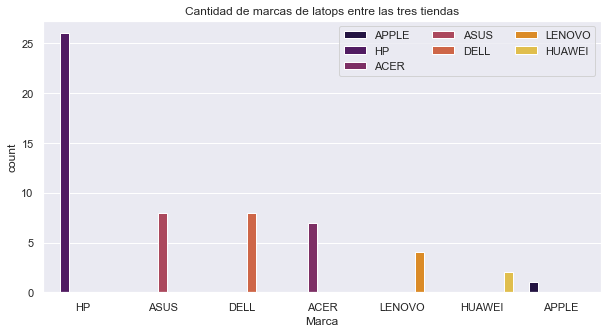

In [43]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x = Cluster_1['Marca'], order = Cluster_1['Marca'].value_counts().index,palette = 'inferno',
              hue = Cluster_1['Marca'])
plt.legend(ncol=3)
plt.title('Cantidad de marcas de latops entre las tres tiendas')
plt.show()

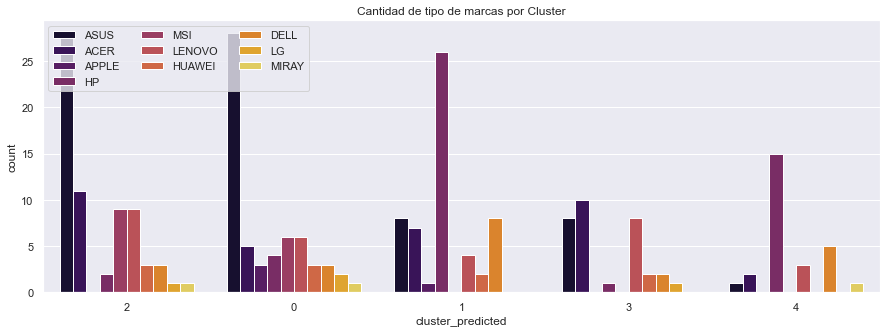

In [44]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = combineDF['cluster_predicted'], palette = 'inferno',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Marca'])
plt.title('Cantidad de tipo de marcas por Cluster')
plt.legend(ncol=3) 
plt.show() 

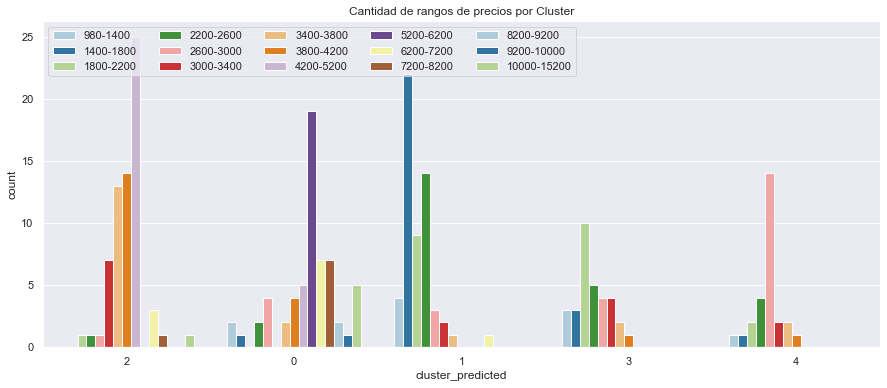

In [45]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'Paired',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Precio Online_categ'])
plt.legend(ncol=5)
plt.title('Cantidad de rangos de precios por Cluster')
plt.show() 

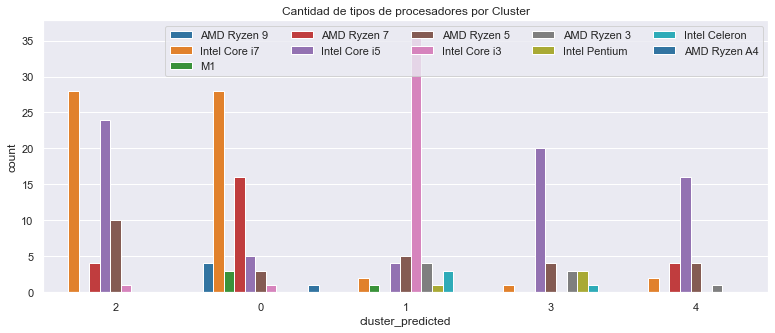

In [46]:
sns.set(rc={'figure.figsize':(13,5)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'tab10',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Procesador'])
plt.legend(ncol=5)
plt.title('Cantidad de tipos de procesadores por Cluster')
plt.show() 

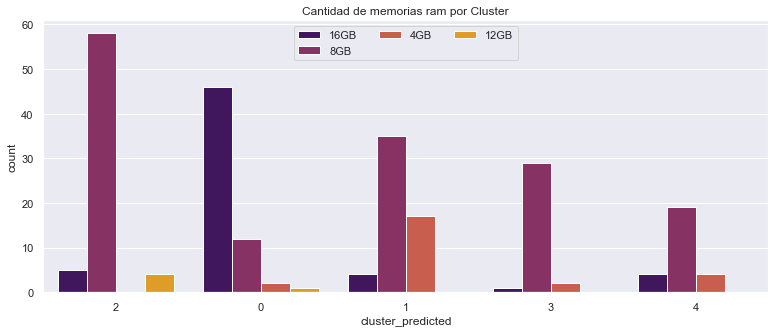

In [47]:
sns.set(rc={'figure.figsize':(13,5)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'inferno',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Memoria Ram'])
plt.legend(ncol=3)
plt.title('Cantidad de memorias ram por Cluster')
plt.show() 

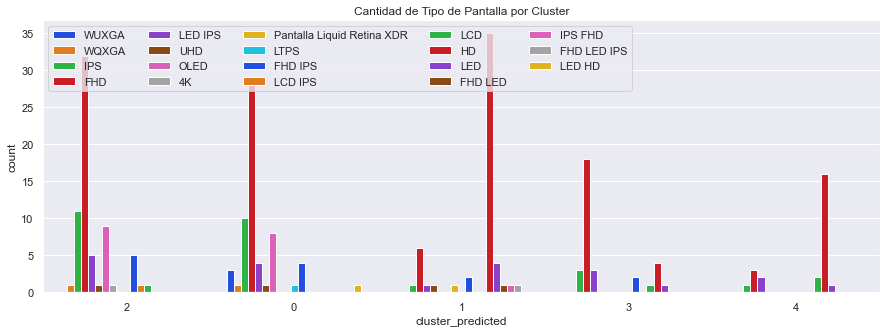

In [48]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'bright',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Tipo de Pantalla'])
plt.legend(ncol=5)
plt.title('Cantidad de Tipo de Pantalla por Cluster')
plt.show() 

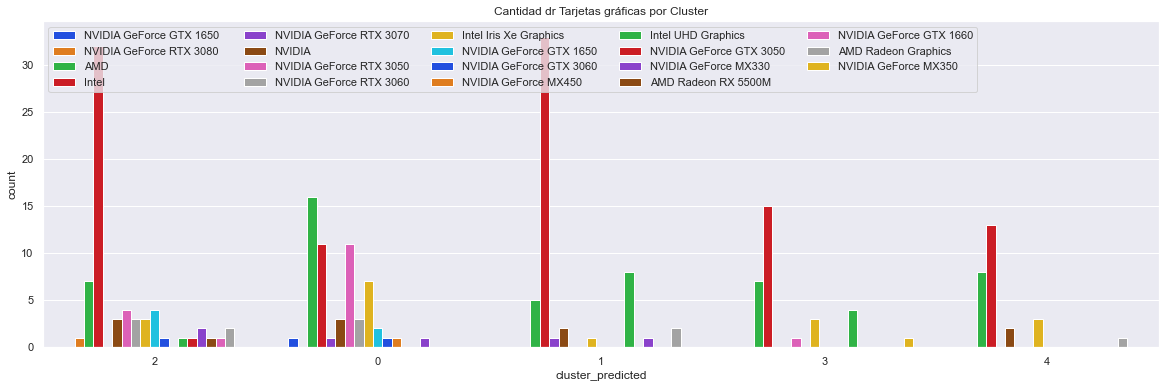

In [49]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'bright',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Tarjeta de Video'])
plt.legend(ncol=5)
plt.title('Cantidad dr Tarjetas gráficas por Cluster')
plt.show() 

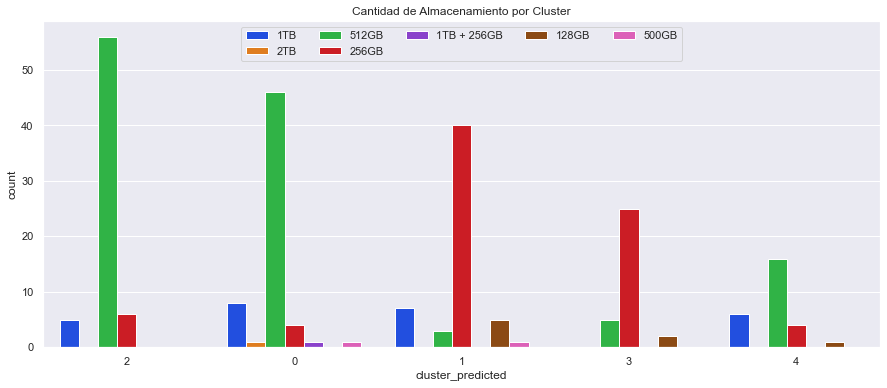

In [50]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x = combineDF['cluster_predicted'],palette = 'bright',
              order=combineDF['cluster_predicted'].value_counts().index,hue=combineDF['Almacenamiento'])
plt.legend(ncol=5)
plt.title('Cantidad de Almacenamiento por Cluster')
plt.show() 